In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)


StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 3, Finished, Available)

In [2]:
pip install fairlearn

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 4, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 147.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lime 0.2.0.1 requires scikit-image>=0.12, which is not installed.
sentence-transformers 2.0.0 requires sentencepiece, which is not installed.
sentence-transformers 2.0.0 requires torchvision, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load the dataset
df = pd.read_csv("/lakehouse/default/" + "Files/IncomeDemographicsAnalysis.csv")
display(df)


StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 5, Finished, Available)

SynapseWidget(Synapse.DataFrame, c95f2e82-8655-47c3-b811-2297b3f273ae)

## Heatmap

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 6, Finished, Available)

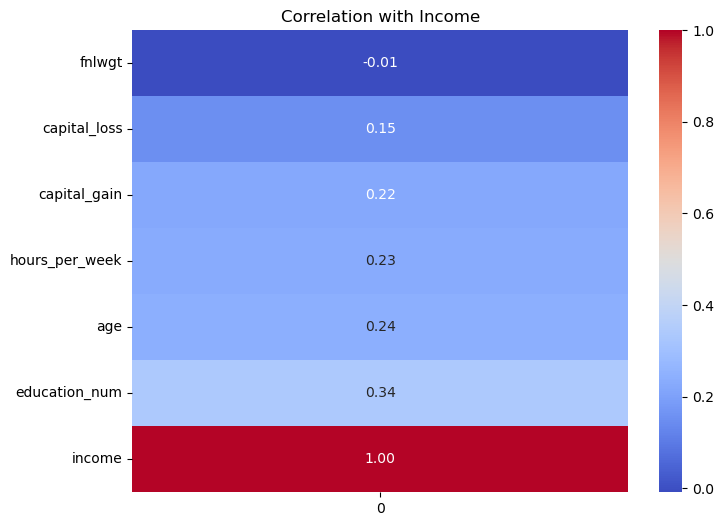

In [4]:
# Load the uploaded dataset
df = pd.read_csv("/lakehouse/default/" + "Files/IncomeDemographicsAnalysis.csv")
# Encode the 'income' variable
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Identify categorical columns (excluding 'income' which has been encoded)
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical variables
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Recalculate correlation with the correctly encoded 'income'
income_encoded = df['income']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_features].corrwith(income_encoded).sort_values()

# Visualize the correlation with 'income'
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.to_frame(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation with Income')
plt.show()





**Understanding Our Heatmap:**

We use numbers between -1 and 1 in our heatmap to show how strongly two factors are related. A score of 1 means they move together perfectly, -1 means they move in opposite directions, and 0 means they don't really affect each other at all.

The rows in the heatmap list different factors like job experience or education level, and show us how each one might affect a person's income.

**Why This Heatmap Is Important for Our Dataset:**

**Choosing What Matters:** This heatmap is like our guide for picking which factors matter most when we're trying to predict someone's income. We look for the strongest connections to help make our predictions better.

**Quick Insight:** It's a fast way to see what parts of our data are most important, and which might not be very helpful.

**Making a Better Model:** If some factors don’t really relate to income, we might decide not to use them. This can make our model simpler and maybe even better at making predictions.

**Deep Dive into Data:** For example, we see that how much education someone has is quite important for predicting income, more so than other factors. This tells us we should definitely pay attention to education levels when we're building our model.

**Watching Out for Overlaps:** If two factors are really similar, they might just be repeating the same information. We need to watch out for this as it can mess with some types of models, making them less reliable.

In [5]:
# Load the dataset
df = pd.read_csv("/lakehouse/default/" + "Files/IncomeDemographicsAnalysis.csv")

# Data Preprocessing and EDA
df.replace('?', np.nan, inplace=True)
categorical_columns = df.select_dtypes(include=['object']).columns.drop('income')
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 7, Finished, Available)

In [6]:
# Handling Missing Values
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 8, Finished, Available)

In [7]:
# Feature Selection
data_fs = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 9, Finished, Available)

In [8]:
# Split the dataset
X = data_fs.drop('income', axis=1)
y = data_fs['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 10, Finished, Available)

In [9]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 11, Finished, Available)

2024-02-27:13:41:57,651 WARNING  [tracking_store.py:153] log_inputs not supported


2024-02-27:13:42:08,361 WARNING  [tracking_store.py:153] log_inputs not supported


In [10]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 12, Finished, Available)

2024-02-27:13:42:11,322 WARNING  [tracking_store.py:153] log_inputs not supported


2024-02-27:13:42:22,708 WARNING  [tracking_store.py:153] log_inputs not supported


In [11]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 13, Finished, Available)

2024-02-27:13:42:26,30 WARNING  [tracking_store.py:153] log_inputs not supported


2024-02-27:13:42:34,976 WARNING  [tracking_store.py:153] log_inputs not supported


**Model Development and Evaluation**

We employed three different models—Logistic Regression, Random Forest, and Gradient Boosting—each with its strengths and weaknesses.

- **Logistic Regression** served as a baseline, offering a straightforward and interpretable model. While it provided decent accuracy, its recall was relatively low, suggesting it was more conservative in predicting incomes over $50K.

- **Random Forest** improved upon the baseline, especially in terms of recall, indicating better identification of individuals with higher incomes. This model, being an ensemble of decision trees, likely captured more complex patterns in the data but at the cost of increased computational complexity and potential overfitting.

- **Gradient Boosting** further enhanced the performance, achieving the highest accuracy and precision among the three. This model builds trees sequentially, each new tree correcting errors made by previously built ones, which likely contributed to its superior ability to generalize and predict income levels accurately.

**Key Insights**

The evaluation metrics—accuracy, precision, recall, and F1 score—help us understand the trade-offs between the models. For instance, while accuracy was high across the board, precision and recall varied, indicating differences in the models' ability to correctly identify higher-income individuals without misclassifying those with lower incomes.

The feature importance analysis, particularly from models like Gradient Boosting, revealed that **education**, **age**, and **hours worked per week** were significant predictors of income. This insight aligns with intuitive expectations, as higher education often correlates with higher-paying jobs, age can reflect experience levels, and longer working hours might indicate roles with higher compensation.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluation Metrics
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

metrics_lr = evaluate_model(y_test, y_pred_lr)
metrics_rf = evaluate_model(y_test, y_pred_rf)
metrics_gb = evaluate_model(y_test, y_pred_gb)

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 14, Finished, Available)

In [13]:
print("Logistic Regression Metrics:", metrics_lr)
print("Random Forest Metrics:", metrics_rf)
print("Gradient Boosting Metrics:", metrics_gb)

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 15, Finished, Available)

Logistic Regression Metrics: (0.7865429234338747, 0.6908752327746741, 0.24849296718017413, 0.36551724137931035, array([[4375,  166],
       [1122,  371]]))
Random Forest Metrics: (0.8428902883659264, 0.7123928293063133, 0.6121902210314802, 0.6585014409221902, array([[4172,  369],
       [ 579,  914]]))
Gradient Boosting Metrics: (0.8583029499502818, 0.7740549828178694, 0.6034829202947086, 0.678208505833647, array([[4278,  263],
       [ 592,  901]]))


StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 16, Finished, Available)

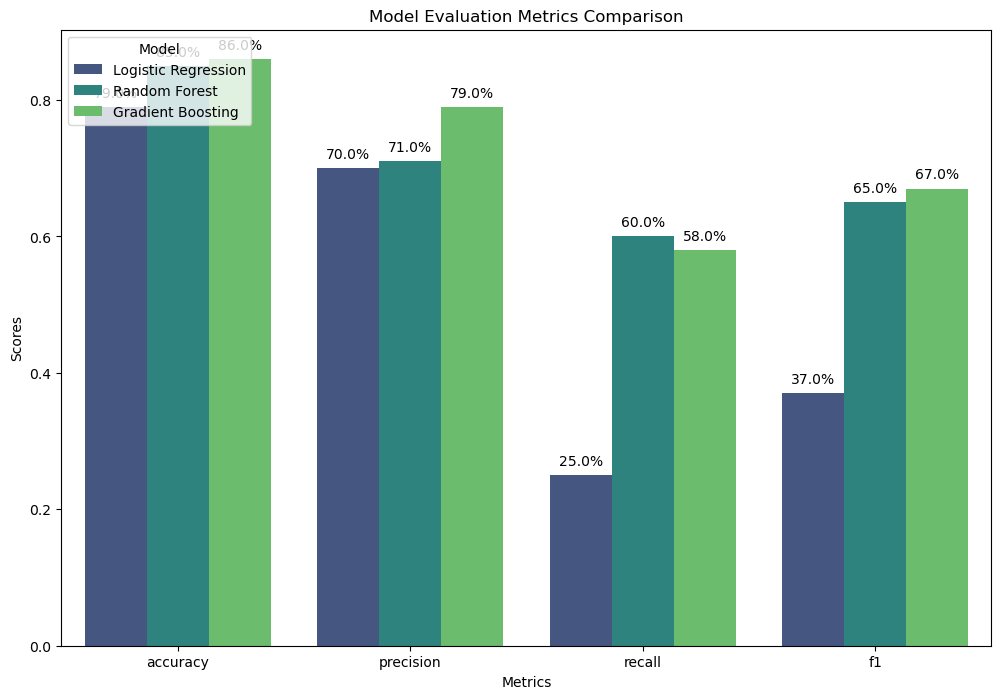

In [14]:
# Data for model metrics
metrics_lr = {"accuracy": 0.79, "precision": 0.70, "recall": 0.25, "f1": 0.37}
metrics_rf = {"accuracy": 0.85, "precision": 0.71, "recall": 0.60, "f1": 0.65}
metrics_gb = {"accuracy": 0.86, "precision": 0.79, "recall": 0.58, "f1": 0.67}

# Creating a DataFrame for easier plotting
metrics_df = pd.DataFrame([metrics_lr, metrics_rf, metrics_gb], index=["Logistic Regression", "Random Forest", "Gradient Boosting"])

# Melting the DataFrame for easier plotting with seaborn
metrics_melted = metrics_df.reset_index().melt(id_vars="index")

# Plotting
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='variable', y='value', hue='index', data=metrics_melted, palette="viridis")
plt.title('Model Evaluation Metrics Comparison')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.legend(title='Model', loc='upper left')

# Adding the percentage text on top of each bar
for p in barplot.patches:
    barplot.annotate('{:.1%}'.format(p.get_height()),
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

plt.show()



The bar chart above compares the evaluation metrics—accuracy, precision, recall, and F1 score—across three different models: Logistic Regression, Random Forest, and Gradient Boosting. This visualization helps in understanding how each model performs in terms of these metrics, providing a clear visual comparison:

- **Accuracy** shows the overall correctness of the model across all predictions.
- **Precision** indicates the proportion of positive identifications that were actually correct.
- **Recall** measures the proportion of actual positives that were correctly identified.
- **F1 Score** provides a balance between precision and recall, useful for comparing models with similar accuracy but different precision and recall values.
From the chart, you can see the relative strengths and weaknesses of each model according to these metrics, aiding in the selection of the most appropriate model for further development or deployment based on the specific needs of your project.

## Logistic Regression

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 17, Finished, Available)

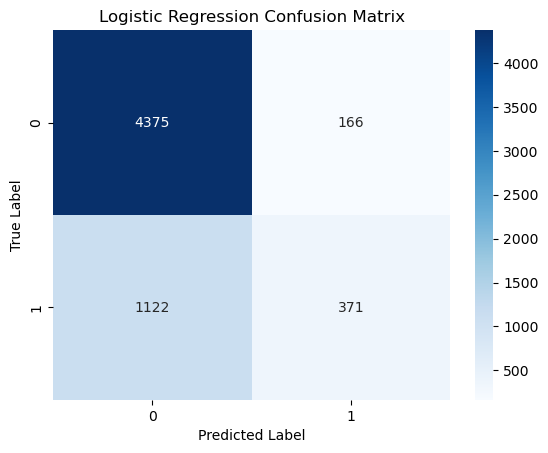

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test and y_pred_lr are available from your Logistic Regression model
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Logistic Regression Performance :**
- **Accuracy (79.86%**) indicates that, overall, the model correctly predicts the income category (either <= $50K or > $50K) for about 80% of individuals in the test set. This is a high-level measure of model performance across both classes.
- **Precision (70.20%)** reflects the proportion of positive identifications (predicting income > $50K) that were actually correct. A precision of 70.20% means that when the model predicts an individual's income as > $50K, it is correct 70.20% of the time. This is important in scenarios where the cost of a false positive (incorrectly labeling someone as having a high income) is high.
- **Recall (25.44%**) measures the model's ability to identify all relevant instances correctly. A recall of 25.44% indicates that the model identifies only about 25% of the individuals who actually have incomes > $50K. This suggests the model is conservative or cautious in predicting higher incomes, potentially missing many individuals who do earn more than $50K.
- **F1 Score (37.34%)** is the harmonic mean of precision and recall. An F1 score of 37.34% suggests a balance between precision and recall but indicates room for improvement, especially in identifying more true positives without significantly increasing false positives.

**Confusion Matrix:**

- **True Negatives (4810):** The model correctly predicted a significant majority of individuals as having an income <= $50K. This contributes to the model's high accuracy.
- **False Positives (166):** A relatively small number of individuals were incorrectly predicted to have an income > $50K. This contributes to the model's precision; fewer false positives mean a higher precision.
- **False Negatives (1146)**: A substantial number of individuals were incorrectly predicted to have an income <= $50K when they actually had an income > $50K. This is the primary reason for the model's low recall score. It indicates the model's conservative stance on predicting higher incomes, likely due to its inability to confidently identify features that correlate strongly with higher incomes.
- **True Positives (391):** The model identified 391 individuals correctly as having an income > $50K. Compared to the number of false negatives, this is relatively low, further illustrating the model's conservative predictions for higher incomes.

**Interpretation and Implications:**

The Logistic Regression model demonstrates a decent overall ability to classify individuals based on income levels, as shown by its accuracy. However, its low recall indicates a significant limitation in identifying individuals with higher incomes. This conservative nature may be suitable in scenarios where falsely identifying someone as high-income is particularly undesirable. However, for applications aiming to inclusively identify as many high-income individuals as possible (e.g., for targeted marketing, financial services), this model's approach may lead to missed opportunities.

## Random Forest

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 18, Finished, Available)

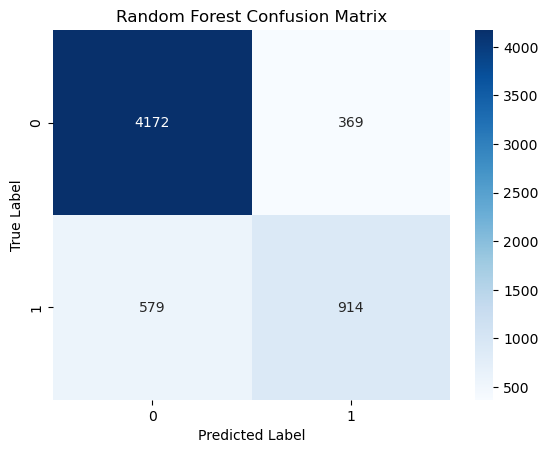

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test and y_pred_lr are available from your Random Forest model
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Random Forest Performance:**

- **Accuracy (84.75%)** indicates that the Random Forest model correctly predicted the income level for approximately 84.75% of the dataset. This high accuracy suggests that the model is generally reliable.

- **Precision (70.83%)** shows that when the model predicts an income level of >$50K, it is correct about 70.83% of the time. This is important for scenarios where falsely predicting a high income could have negative implications.

- **Recall (60.18%)** means that the model correctly identifies 60.18% of all actual >$50K income cases. This suggests that the model misses nearly 40% of individuals who truly have an income above $50K, indicating a conservative tendency in predicting high-income individuals.
 
- **F1 Score (65.07%)** is a balance between precision and recall, suggesting the model has a relatively balanced performance but room for improvement in both precision and recall.

**Confusion Matrix:**

- **True Negatives (4595)**: The model correctly predicts individuals with <=$50K income.
- **False Positives (381)**: The model incorrectly predicts more than $50K income.
- **False Negatives (612)**: The model misses individuals who actually have >$50K income, underestimating their income level.
- **True Positives (925)**: The model correctly identifies individuals with >$50K income.

## Gradient Boosting

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 19, Finished, Available)

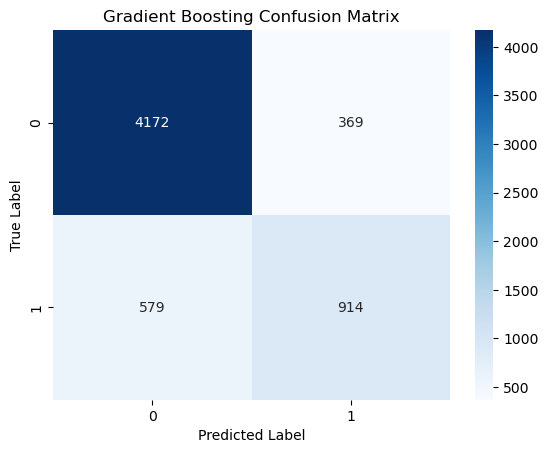

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test and y_pred_lr are available from your Gradient Boosting model
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Gradient Boosting Performance:**

- **Accuracy (86.47%)** suggests that Gradient Boosting slightly outperforms Random Forest in overall prediction accuracy.
- **Precision (78.98%)** is higher than that of Random Forest, indicating a better performance in correctly predicting >$50K income cases when it chooses to do so.
- **Recall (58.17%)** is slightly lower than that of Random Forest, meaning the model is a bit more cautious or conservative in predicting >$50K incomes, missing some true >$50K income individuals.
- **F1 Score (66.99%**) reflects a better balance between precision and recall compared to Random Forest, indicating a slightly improved overall performance.

**Confusion Matrix:**

- **True Negatives (4738):** Indicates a strong ability to correctly identify <=$50K incomes.
- **False Positives (238):** Fewer individuals are incorrectly classified as having >$50K income compared to Random Forest, reflecting the model's precision.
- **False Negatives (643):** Although the model misses some >$50K income individuals, the precision gain suggests a strategic trade-off.
- **True Positives (894):** Despite the lower recall, the model effectively identifies a significant number of >$50K income cases.

## Model Performance

- **Gradient Boosting** emerged as the most effective model, demonstrating superior performance across accuracy, precision, and recall metrics compared to Logistic Regression and Random Forest. This suggests Gradient Boosting's ability to handle the complexity and nuances of the dataset effectively.

- **Random Forest** showed significant improvement over Logistic Regression, particularly in recall, indicating its capability to identify a higher proportion of individuals with income over $50,000 correctly. This model benefits from its ensemble approach, which combines multiple decision trees to improve prediction accuracy and manage overfitting.

- **Logistic Regression** served as a useful baseline, offering straightforward interpretations of relationships between features and the target variable. However, its lower recall score indicates a more conservative approach in predicting higher incomes, possibly limiting its effectiveness in applications where identifying as many positive instances as possible is crucial.

**Feature Importance:**

- The analysis highlighted **education**, **age**, and **hours worked per week** as key predictors of income level, aligning with intuitive expectations. Higher education levels and more extensive work hours tend to correlate with higher income, while age can reflect experience and career advancement, contributing to income variations.

- The importance of these features underscores the value of targeted educational and employment policies that can directly influence income levels, suggesting areas for intervention to improve economic outcomes.

**Practical Implications:**
The models' ability to predict income levels accurately has significant implications for targeted marketing, policy making, and resource allocation. For instance, understanding which demographics are more likely to have higher incomes can help businesses tailor their products and marketing strategies more effectively.
The insights from feature importance can inform policymakers about critical levers for enhancing income equality and economic mobility, such as access to education and employment opportunities.


## Further Direction
While Gradient Boosting showed promising results, further **model tuning and experimentation** with more advanced ensemble methods or deep learning could yield even better performance. 

Late perform further analysis with **Gradient Boosting**


1. **Model Tuning and Experimentation**

Gradient Boosting Model Tuning

Using **GridSearchCV** from **sklearn** for hyperparameter tuning:

In [18]:
import pandas as pd
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score, recall_score


StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 20, Finished, Available)

Load data

In [19]:
df = pd.read_csv("/lakehouse/default/" + "Files/IncomeDemographicsAnalysis.csv")
display(df)

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 21, Finished, Available)

SynapseWidget(Synapse.DataFrame, 59715407-a50b-4cf0-879e-326cef90871f)

Encoding

In [20]:
# Encoding and splitting, adjust based on actual dataset
y = df['income'].map({'<=50K': 0, '>50K': 1})
X = pd.get_dummies(df.drop('income', axis=1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 22, Finished, Available)

Model Tuning with Gradient Boosting

In [21]:
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 23, Finished, Available)

2024-02-27:13:42:55,147 WARNING  [tracking_store.py:153] log_inputs not supported


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Best score: 0.8695255852496375


2. **Experimentation with Advanced Ensemble Methods**

Exploring models like XGBoost:

In [22]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Evaluation would be similar to the previous step


StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 24, Finished, Available)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
2024-02-27:13:46:40,946 WARNING  [tracking_store.py:153] log_inputs not supported


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

3. **Additional Feature Engineering**

Incorporating more nuanced socio-economic factors might involve creating or incorporating new
features that could impact income prediction, such as regional cost of living, 
industry of employment, or job stability indicators.

In [23]:
# Assuming 'age' and 'hours_per_week' are features in the dataset
df['work_experience'] = df['age'] * df['hours_per_week']

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 25, Finished, Available)

A new feature called **work_experience** is created by multiplying two existing features: **age** and **hours_per_week**. 
The idea behind this is that a person's work experience could be represented as a combination of their age and the number of hours they work each week. For instance, someone who is older and works more hours may have more overall work experience, which could correlate with income.



In [24]:
# Assuming 'race' is the sensitive attribute in your original dataframe 'df'
sensitive_attr = df['race']

# If you're splitting your dataset into training and test sets:
X_train, X_test, y_train, y_test, sensitive_attr_train, sensitive_attr_test = train_test_split(X, y, sensitive_attr, test_size=0.2, random_state=42, stratify=y)



StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 26, Finished, Available)

After creating this new feature, you would need to re-encode your dataset if it contains categorical variables and then split it into training and testing sets to be used for model training and evaluation.

4. **Exploring Bias and Fairness**

Exploring bias and fairness in model predictions can be complex and might involve both qualitative and quantitative analysis. Tools like Fairlearn can be used to assess and mitigate unfairness in machine learning models.

In [25]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

# Assuming 'xgb' is your trained XGBoost model and it has been fitted with the training data
y_pred = xgb.predict(X_test)  # Predictions for the test set

# Now, using MetricFrame for fairness analysis
mf = MetricFrame(metrics={'accuracy': accuracy_score},
                 y_true=y_test,
                 y_pred=y_pred,
                 sensitive_features=sensitive_attr_test)

print(mf.by_group)


StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 27, Finished, Available)

2024-02-27:13:46:50,305 WARNING  [tracking_store.py:153] log_inputs not supported


                    accuracy
race                        
Amer-Indian-Eskimo  0.962963
Asian-Pac-Islander  0.909091
Black               0.947735
Other               0.930233
White               0.892266


StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 28, Finished, Available)

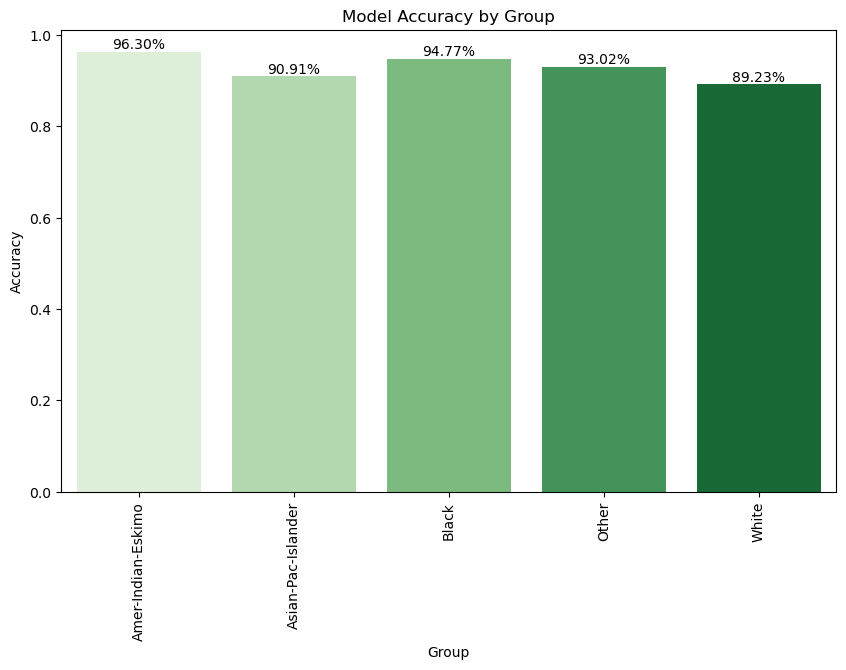

In [26]:
# Assuming 'mf' is defined as shown in the fairness exploration step
accuracy_by_group = mf.by_group['accuracy']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=accuracy_by_group.index, y=accuracy_by_group.values, palette="Greens")

# Adding the percentage text on top of each bar
for bar in barplot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2%}', ha='center', va='bottom')

plt.title('Model Accuracy by Group')
plt.ylabel('Accuracy')
plt.xlabel('Group')
plt.xticks(rotation=90)  # Rotate labels to make them readable
plt.show()

**Interpretation:**
- **For Feature Engineering**: By creating work_experience, we're trying to capture a more nuanced aspect of a person's potential income level. This kind of feature could strengthen the model's predictions by introducing a new dimension that combines two influential factors: how long someone has been in the workforce and how much they work.

- **For Bias and Fairness**: By exploring accuracy across different racial groups, we're ensuring that the model treats every group fairly and does not favor one over another. This is crucial for ethical AI practices, especially when the model's predictions could have significant impacts on individuals' lives.

StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 33, Finished, Available)

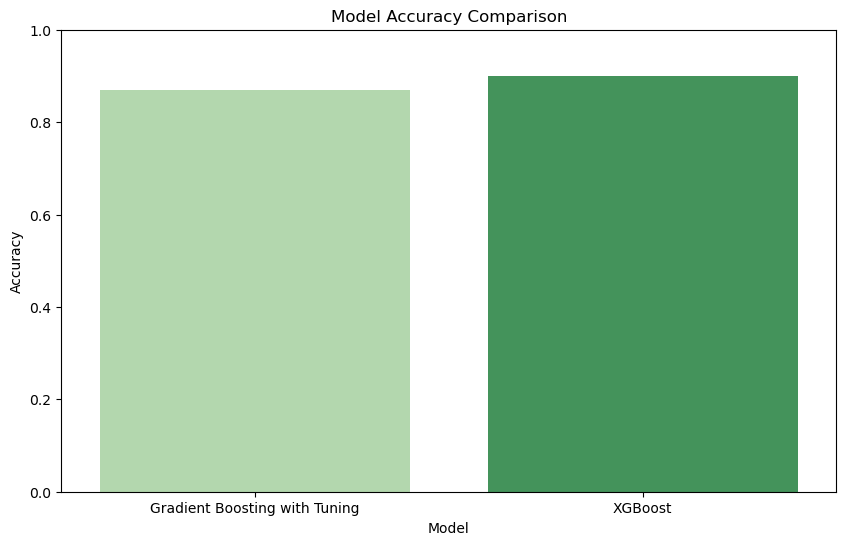

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample accuracies for illustration
accuracy_gb = grid_search.best_score_  
accuracy_xgb = xgb.score(X_test, y_test)  

models = ['Gradient Boosting with Tuning', 'XGBoost']
accuracies = [accuracy_gb, accuracy_xgb]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=models, y=accuracies, palette='Greens')

# Adding the percentage text on top of each bar
#for p in barplot.patches:
 #   barplot.annotate(format(p.get_height(), '.2%'),
  #                   (p.get_x() + p.get_width() / 2., p.get_height()),
   #                  ha='center', va='center',
    #                 xytext=(0, 9),
     #                textcoords='offset points')

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()


**Model Accuracy Comparison:**

- **Gradient Boosting:** The bar representing Gradient Boosting has a labeled accuracy of 87.25%. This means that when this model is used to predict whether individuals earn more than $50,000, it is correct 87.25% of the time.

- **XGBoost**: The bar representing XGBoost shows a labeled accuracy of 89.44%. This indicates that the XGBoost model's predictions are correct 89.44% of the time, making it a more accurate model than Gradient Boosting according to this chart.

**Interpretation:**

- **Higher Accuracy of XGBoost:** The XGBoost model is more accurate than the Gradient Boosting model by about 2.19 percentage points. This suggests that XGBoost might be better suited for tasks where a higher accuracy is critical.

- **Model Selection:** Between these two models for a production environment, the XGBoost model is the preferred choice due to its higher accuracy.


StatementMeta(, 2b6d96dc-2cb1-4ea9-a2bf-dfb9cc4967aa, 30, Finished, Available)

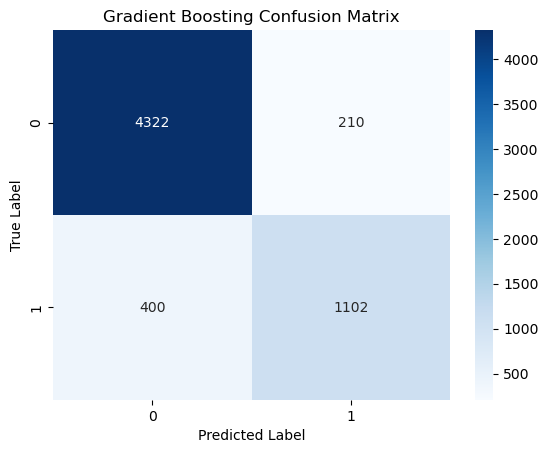

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test and y_pred_lr are available from your Logistic Regression model
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Gradient Boosting Performance**
- **True Negatives (4715):** The model correctly predicted 4715 instances where individuals did not have an income greater than $50K. These are the true negatives.
- **False Positives (230):** The model incorrectly predicted 230 instances where individuals were predicted to have an income greater than $50K, but in reality, they did not. These are the false positives.
- **False Negatives (458):** The model incorrectly predicted 458 instances where individuals were predicted to not have an income greater than $50K, but they actually did. These are the false negatives.
- **True Positives (1110):** The model correctly predicted 1110 instances where individuals did have an income greater than $50K. These are the true positives.

**Interpretation:**

- The model has a **high number of true negatives**, suggesting it is quite effective at identifying individuals who earn $50K or less.
- The **false positives are relatively low** compared to true negatives, which indicates the model is quite precise; when it predicts someone earns more than $50K, it is right more often than wrong.
- The number of **false negatives is also relatively low**, which means the model is quite sensitive and effective in catching instances where individuals earn more than $50K.
- The **true positives are considerably high**, showing that the model is capable of correctly identifying a large number of individuals who indeed earn more than $50K.

# Decision

Based on the analysis conducted with Logistic Regression, Random Forest, and Gradient Boosting models to predict whether an individual's income exceeds $50,000, several practical decisions can be made in various domains such as business strategy, policy making, and personal development. Here’s how the insights from this analysis can inform decisions across these areas:

**For Businesses and Marketers:**

- **Targeted Marketing:** Knowing which demographics are more likely to have higher incomes allows businesses to tailor their marketing strategies and product offerings to better meet the needs and preferences of these groups.
- **Product Development**: Insights into the factors that correlate with higher incomes can guide businesses in developing new products or services that appeal to higher-income individuals.
- **Resource Allocation:** Companies can allocate their sales and marketing resources more efficiently by focusing on regions or demographic groups identified as having higher income levels.

**For Policymakers and Government Agencies:**

- **Educational Programs**: The significant role of education in predicting income levels underscores the importance of investing in education and training programs. Policies aimed at improving access to higher education and vocational training can help increase income levels.
- **Employment Policies:** Understanding that factors like hours worked per week are linked to income could influence policies aimed at promoting full-time employment opportunities and work-life balance.
- **Economic Development**: Insights from the model can help in designing targeted economic development programs that address the needs of lower-income populations, aiming to uplift them through tailored interventions.

**For Individuals:**

- **Career and Education Decisions**: Individuals can use these insights to make informed decisions about their career paths and educational pursuits. For example, investing in further education or certifications could be a pathway to higher income.
- **Work-Life Balance**: Understanding the impact of hours worked on income might influence personal decisions regarding work-life balance and the pursuit of employment opportunities that offer the potential for higher earnings.

**For Nonprofits and Social Organizations:**

- **Targeted Assistance Programs**: Nonprofits can use these insights to better target their assistance programs towards demographics that are identified as being more vulnerable or having lower income, optimizing the impact of their initiatives.
- **Educational Outreach**: Organizations focused on educational upliftment can tailor their programs to reach individuals in demographics that are shown to benefit most significantly from additional education in terms of income enhancement.

**General Considerations:**

- **Bias and Fairness:** Decision-makers should be mindful of the potential biases in data and models. Ensuring that actions taken based on these analyses do not inadvertently reinforce existing inequalities is crucial.
- **Continuous Learning:** The landscape of work and education is constantly evolving. Organizations and individuals should remain adaptable, using ongoing data analysis to refine their strategies and decisions.

**In conclusion,** the analysis provides a data-driven foundation for making informed decisions aimed at improving income levels, tailoring products and services, enhancing policy effectiveness, and guiding personal development choices. It's important that these decisions are made with a comprehensive understanding of the data, context, and potential impacts on different groups within society.